In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "../output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

638


In [4]:
#  Perform API Calls

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

In [5]:
# Base URL to work off     
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | dikson.
Processing Record 1  of Set 1 | butaritari.
Processing Record 2  of Set 1 | young.
Processing Record 3  of Set 1 | pevek.
Processing Record 4  of Set 1 | hede.
Processing Record 5  of Set 1 | castro.
Processing Record 6  of Set 1 | taguatinga.
Processing Record 7  of Set 1 | cabo san lucas.
Processing Record 8  of Set 1 | port alfred.
Processing Record 9  of Set 1 | porto novo.
Processing Record 10  of Set 1 | aurillac.
Processing Record 11  of Set 1 | torbay.
Processing Record 12  of Set 1 | tsihombe.
City not found...skipping tsihombe.
Processing Record 13  of Set 1 | norman wells.
Processing Record 14  of Set 1 | cidreira.
Processing Record 15  of Set 1 | jennings.
Processing Record 16  of Set 1 | songjianghe.
Processing Record 17  of Set 1 | maple creek.
Processing Record 18  of Set 1 | mantua.
Processing Record 19  of Set 1 | illoqqortoormiut.
City not found...skipping illoqqortoormiut.


Processing Record 24  of Set 4 | kahului.
Processing Record 25  of Set 4 | barrow.
Processing Record 26  of Set 4 | kholodnyy.
Processing Record 27  of Set 4 | chimbote.
Processing Record 28  of Set 4 | necochea.
Processing Record 29  of Set 4 | hamilton.
Processing Record 30  of Set 4 | lebu.
Processing Record 31  of Set 4 | hit.
Processing Record 32  of Set 4 | takob.
City not found...skipping takob.
Processing Record 33  of Set 4 | rosetown.
Processing Record 34  of Set 4 | sinnamary.
Processing Record 35  of Set 4 | carnarvon.
Processing Record 36  of Set 4 | eyl.
Processing Record 37  of Set 4 | soresina.
Processing Record 38  of Set 4 | pacific grove.
Processing Record 39  of Set 4 | porto belo.
Processing Record 40  of Set 4 | kamenka.
Processing Record 41  of Set 4 | jamkhandi.
Processing Record 42  of Set 4 | tacuarembo.
Processing Record 43  of Set 4 | sandwick.
Processing Record 44  of Set 4 | ourinhos.
Processing Record 45  of Set 4 | narsaq.
Processing Record 46  of Set 4 

Processing Record 6  of Set 8 | sentyabrskiy.
City not found...skipping sentyabrskiy.
Processing Record 7  of Set 8 | verkhnyaya toyma.
Processing Record 8  of Set 8 | staryy nadym.
Processing Record 9  of Set 8 | lilongwe.
Processing Record 10  of Set 8 | hambantota.
Processing Record 11  of Set 8 | lisakovsk.
Processing Record 12  of Set 8 | samusu.
City not found...skipping samusu.
Processing Record 13  of Set 8 | leshukonskoye.
Processing Record 14  of Set 8 | saldanha.
Processing Record 15  of Set 8 | khandyga.
Processing Record 16  of Set 8 | caraquet.
Processing Record 17  of Set 8 | ngukurr.
City not found...skipping ngukurr.
Processing Record 18  of Set 8 | ashland.
Processing Record 19  of Set 8 | mahebourg.
Processing Record 20  of Set 8 | bowen.
Processing Record 21  of Set 8 | mount isa.
Processing Record 22  of Set 8 | muros.
Processing Record 23  of Set 8 | adrar.
Processing Record 24  of Set 8 | lincoln.
Processing Record 25  of Set 8 | itoman.
Processing Record 26  of 

Processing Record 32  of Set 11 | brae.
Processing Record 33  of Set 11 | mogadishu.
Processing Record 34  of Set 11 | codrington.
Processing Record 35  of Set 11 | okha.
Processing Record 36  of Set 11 | manzhouli.
Processing Record 37  of Set 11 | palabuhanratu.
City not found...skipping palabuhanratu.
Processing Record 38  of Set 11 | forbes.
Processing Record 39  of Set 11 | tanout.
Processing Record 40  of Set 11 | bathsheba.
Processing Record 41  of Set 11 | iqaluit.
Processing Record 42  of Set 11 | tactic.
Processing Record 43  of Set 11 | margate.
Processing Record 44  of Set 11 | smithers.
Processing Record 45  of Set 11 | scottsburgh.
City not found...skipping scottsburgh.
Processing Record 46  of Set 11 | rawson.
Processing Record 47  of Set 11 | trincomalee.
Processing Record 48  of Set 11 | lasa.
Processing Record 49  of Set 11 | bambanglipuro.
Processing Record 0  of Set 12 | nedumangad.
Processing Record 1  of Set 12 | gold coast.
Processing Record 2  of Set 12 | parais

In [6]:
#  Convert Raw Data to DataFrame
# Data Count
weather_df.count()

City                638
Country             638
Date                638
Latitude            638
Longitude           638
Cloudiness (%)      638
Humidity (%)        638
Max Temp (F)        638
Wind Speed (mph)    638
dtype: int64

In [7]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,dikson,RU,2020-11-01 16:13:00,73.51,80.55,99,98,18.644,3.83
1,butaritari,KI,2020-11-01 16:10:18,3.07,172.79,32,76,82.382,4.13
2,young,UY,2020-11-01 16:18:51,-32.68,-57.63,0,77,56.462,1.98
3,pevek,RU,2020-11-01 16:12:53,69.7,170.31,98,93,15.17,4.5
4,hede,CN,2020-11-01 16:18:51,33.77,120.25,40,60,60.764,2.98


In [9]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

In [10]:
# Export the city data into a .csv.
# Display the DataFrame

# city_data_pd.to_csv("cities.csv", encoding="utf-8", index=False)
# city_data_pd.round()
# city_data_pd.head()

In [11]:
# Inspect the data and remove the cities where the humidity > 100%.

# ha! found one!!!

# Skip this step if there are no cities that have humidity > 100%.

The plot proves that as temperature drops as you move away from the equator


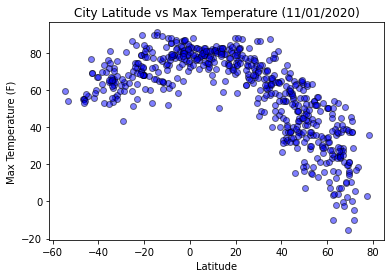

In [17]:
#  Plotting the Data

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as temperature drops as you move away from the equator")

The plot shows that there is no real pattern describing the relationship between latitude and humidity


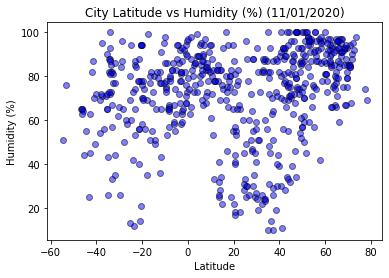

In [18]:
#  Latitude vs. Humidity Plot
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern describing the relationship between latitude and humidity")

The plot shows that the relationship between Cloudiness and Latitude is all over the place and no real pattern can be discerned


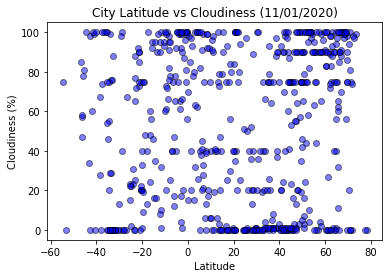

In [20]:
#  Latitude vs. Cloudiness Plot

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that the relationship between Cloudiness and Latitude is all over the place and no real pattern can be discerned")

The plot shows that the relationship between Wind Speed and Latitude is all over the place and no real pattern can be discerned


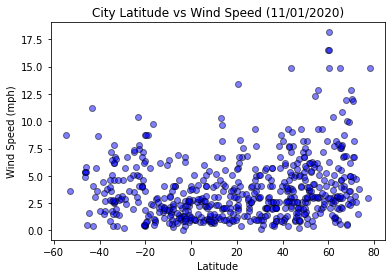

In [22]:
# Latitude vs. Wind Speed Plot


today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that the relationship between Wind Speed and Latitude is all over the place and no real pattern can be discerned")

In [23]:
#  Linear Regression

In [24]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

Regression line equation is: y = -0.97x + 91.24
The r-squared is: -0.8451884566995811
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


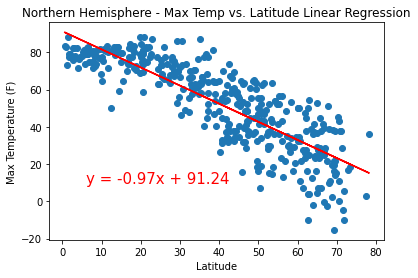

In [25]:
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

In [ ]:
#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
 The r-value is: 0.000543987878808455

In [ ]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
The r-value is: 0.014985174297345524

In [ ]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
The r-value is: 0.0020898727664228514

In [ ]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
 The r-value is: 0.0035263772085582894

In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
 The r-value is: 0.04019723576144484

In [ ]:
#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
The r-value is: 0.017128274759839232